In [290]:
# %%
###### Start of import packages ######
import sys
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from statistics import mean, stdev
from sklearn import linear_model
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import cm as cm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb


pd.set_option('display.max_rows', 100)
###### To ignore warnings ######
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

###### End of import packages ######

sns.set()

In [291]:
# %%
dataset = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [292]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

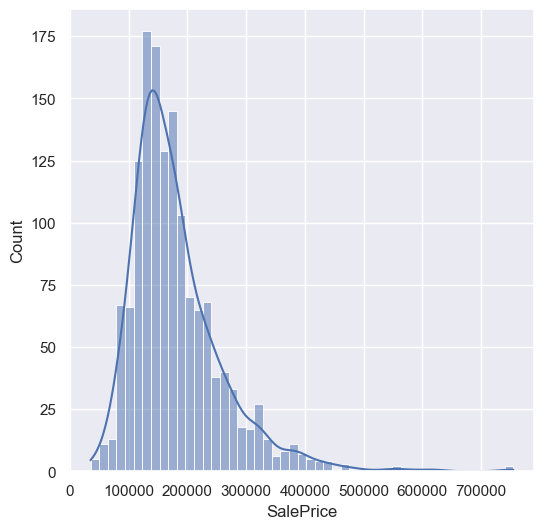

In [293]:
sns.histplot(x='SalePrice', data=dataset, kde=True)
plt.show()

In [294]:
print(dataset['SalePrice'].skew())
print(dataset['SalePrice'].kurtosis())


1.8828757597682129
6.536281860064529


In [295]:
# %%
pd.set_option('display.max_rows', 100)
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [296]:
# # Inspect Correlation
# # corr = dataset.corrwith(dataset['GarageArea']).to_frame()
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [297]:
# # # Category description graphs

# dataset_Category = dataset.select_dtypes(include = object)
# dataset_Category

# def chunks(l, n):
#     return [l[i:i + n] for i in range(0, len(l), n)]


# cols = dataset_Category.columns
# for x in chunks(cols, 5):
#     sns.pairplot(dataset_Category, y_vars=x, x_vars=x)


In [298]:
# # Numerical description graphs
# dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
# dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [299]:
# %%
# Remove Nulls
# dataset.dropna(axis=1,inplace=True)
dataset.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
                 'Fence', 'MiscFeature','GarageType','GarageFinish'], axis=1, inplace=True)
# for x in range(0, dataset.shape[1]):
#     col = dataset.columns[x]
#     if (dataset[col].dtype == object):
#         dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
#     else:
#         dataset[col] = dataset[col].fillna(dataset[col].mean())



for i, column in enumerate(dataset):
    if (dataset[column].dtype == object):
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
    else:
        dataset[column] = dataset[column].fillna(dataset[column].mean())


In [300]:
# Categorical Data Encoding
# Categorical features
cat_features = np.array([i for i in dataset.columns.tolist() if dataset[i].dtype == 'object'])
enc_list = {}

for i in cat_features:
    enc_list[i] = preprocessing.LabelEncoder()
    dataset[i] = enc_list[i].fit_transform(dataset[i])

In [301]:

corr = dataset.corrwith(dataset['SalePrice']).to_frame()
# corr = dataset['GarageArea'].corr(dataset)
# corr
# plt.figure(figsize=(2, 15))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [302]:
# %%
# Drop Highly Correlated
dataset.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
                 'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)


In [303]:
# Drop Low Correlated
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
             "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
             "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
             "YrSold"]
dataset = dataset.drop(drops, axis=1)


In [304]:
# # # Numerical description graphs
# dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
# dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [305]:
# dataset['LotArea'].skew()

In [306]:
# dataset['LotArea'].hist(figsize=(8, 8),  xlabelsize=8, ylabelsize=8)

In [307]:
# dataset = dataset[(dataset['LotArea'] < 50000)]

In [308]:
# dataset['LotArea'].hist(figsize=(8, 8),  xlabelsize=8, ylabelsize=8)


In [309]:
# dataset['LotArea'].skew()

In [310]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,1,3,8450,3,5,2,0,5,7,5,2003,2003,1,1,12,196.0,2,4,2,2,3,2,706,150,856,1,0,1,4,854,1710,1,2,1,3,1,2,6,0,548,4,4,2,0,61,0,0,0,8,4,208500
1,2,3,9600,3,24,1,0,2,6,8,1976,1976,1,1,8,0.0,3,4,1,2,1,0,978,284,1262,1,0,1,4,0,1262,0,2,0,3,1,3,6,1,460,4,4,2,298,0,0,0,0,8,4,181500
2,3,3,11250,0,5,2,0,5,7,5,2001,2002,1,1,12,162.0,2,4,2,2,2,2,486,434,920,1,0,1,4,866,1786,1,2,1,3,1,2,6,1,608,4,4,2,0,42,0,0,0,8,4,223500
3,4,3,9550,0,6,2,0,5,7,5,1915,1970,1,1,13,0.0,3,4,0,3,3,0,216,540,756,1,2,1,4,756,1717,1,1,0,3,1,2,6,1,642,4,4,2,0,35,272,0,0,8,0,140000
4,5,3,14260,0,15,2,0,5,8,5,2000,2000,1,1,12,350.0,2,4,2,2,0,2,655,490,1145,1,0,1,4,1053,2198,1,2,1,4,1,2,6,1,836,4,4,2,192,84,0,0,0,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,7917,3,8,2,0,5,6,5,1999,2000,1,1,12,0.0,3,4,2,2,3,5,0,953,953,1,0,1,4,694,1647,0,2,1,3,1,3,6,1,460,4,4,2,0,40,0,0,0,8,4,175000
1456,1457,3,13175,3,14,2,0,2,6,6,1978,1988,1,1,9,119.0,3,4,1,2,3,0,790,589,1542,1,4,1,4,0,2073,1,2,0,3,1,3,2,2,500,4,4,2,349,0,0,0,0,8,4,210000
1457,1458,3,9042,3,6,2,0,5,7,9,1941,2006,1,1,5,0.0,0,2,4,3,3,2,275,877,1152,1,0,1,4,1152,2340,0,2,0,4,1,2,6,2,252,4,4,2,0,60,0,0,0,8,4,266500
1458,1459,3,9717,3,12,2,0,2,5,6,1950,1996,3,1,8,0.0,3,4,1,3,2,2,49,0,1078,1,2,1,0,0,1078,1,1,0,2,1,2,6,0,240,4,4,2,366,0,112,0,0,8,4,142125


In [311]:
# Drop outliers
dataset = dataset[(dataset['LotArea'] < 50000)]
dataset = dataset[(dataset['MasVnrArea'] < 500)]
dataset = dataset[(dataset['BsmtFinSF1'] < 2300)]
dataset = dataset[(dataset['TotalBsmtSF'] < 5000)]
dataset = dataset[(dataset['GrLivArea'] < 4000)]
dataset = dataset[(dataset['OpenPorchSF'] < 200)]


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'OpenPorchSF'

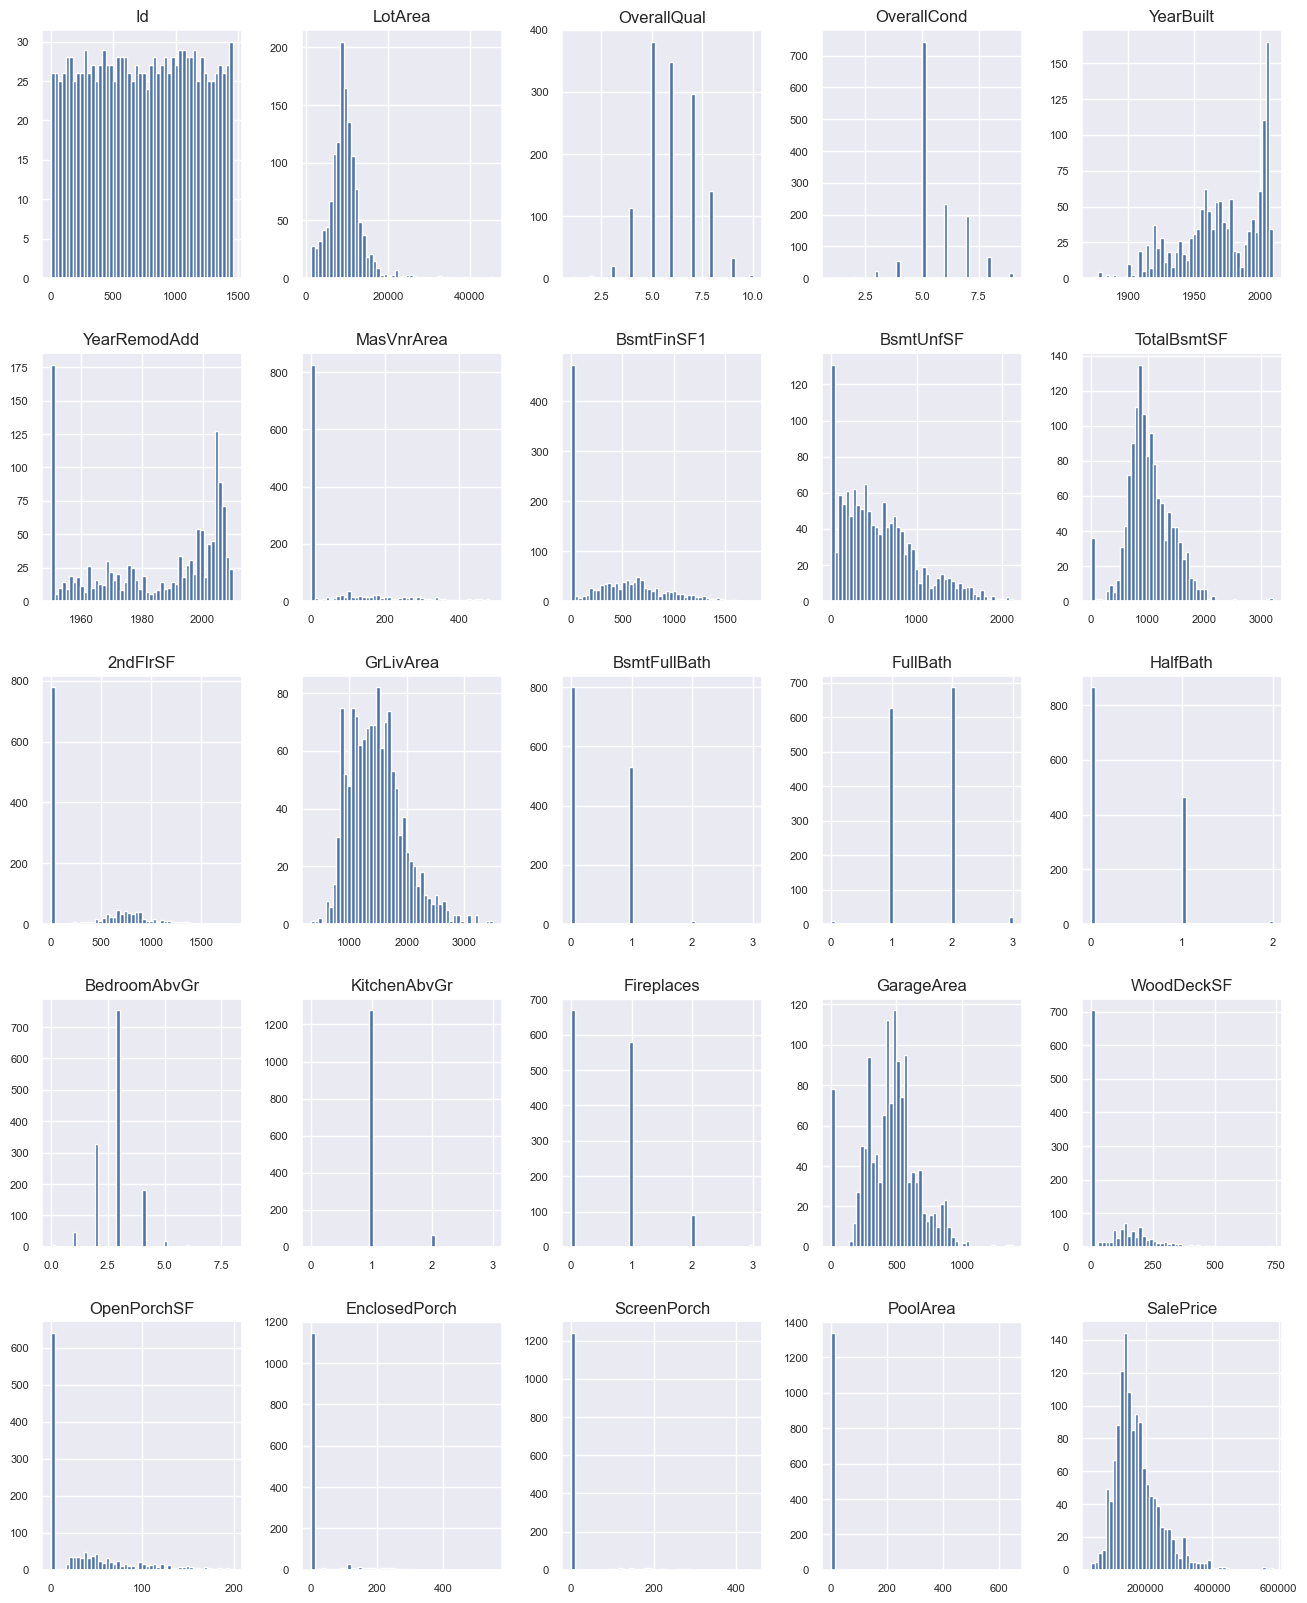

In [312]:
# # # Numerical description graphs
dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [313]:
# Drop Not Important
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
             "GarageQual", "GarageCond", "PavedDrive",
             "PoolArea"]
dataset = dataset.drop(drops, axis=1)


In [314]:
# Drop One-Category
drops = [
'Condition1'  ,
'BldgType'    ,
'ExterCond'    ,
'BsmtQual'     ,
'CentralAir'   ,
'SaleType'     ,
'SaleCondition']
dataset = dataset.drop(drops, axis=1)

In [315]:
# # Numerical decription graphs
# dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
# dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [316]:
# # Inspect Correlation after removal
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [317]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,3,8450,3,5,5,7,5,2003,2003,1,12,196.0,2,2,3,2,706,150,856,0,854,1710,1,2,1,3,1,2,0,548,0,61,0,0,208500
1,2,3,9600,3,24,2,6,8,1976,1976,1,8,0.0,3,1,1,0,978,284,1262,0,0,1262,0,2,0,3,1,3,1,460,298,0,0,0,181500
2,3,3,11250,0,5,5,7,5,2001,2002,1,12,162.0,2,2,2,2,486,434,920,0,866,1786,1,2,1,3,1,2,1,608,0,42,0,0,223500
3,4,3,9550,0,6,5,7,5,1915,1970,1,13,0.0,3,0,3,0,216,540,756,2,756,1717,1,1,0,3,1,2,1,642,0,35,272,0,140000
4,5,3,14260,0,15,5,8,5,2000,2000,1,12,350.0,2,2,0,2,655,490,1145,0,1053,2198,1,2,1,4,1,2,1,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,7917,3,8,5,6,5,1999,2000,1,12,0.0,3,2,3,5,0,953,953,0,694,1647,0,2,1,3,1,3,1,460,0,40,0,0,175000
1456,1457,3,13175,3,14,2,6,6,1978,1988,1,9,119.0,3,1,3,0,790,589,1542,4,0,2073,1,2,0,3,1,3,2,500,349,0,0,0,210000
1457,1458,3,9042,3,6,5,7,9,1941,2006,1,5,0.0,0,4,3,2,275,877,1152,0,1152,2340,0,2,0,4,1,2,2,252,0,60,0,0,266500
1458,1459,3,9717,3,12,2,5,6,1950,1996,3,8,0.0,3,1,2,2,49,0,1078,2,0,1078,1,1,0,2,1,2,0,240,366,0,112,0,142125


In [318]:
# corr = dataset.corrwith(dataset['SalePrice']).to_frame()
# # corr = dataset['GarageArea'].corr(dataset)
# # corr
# plt.figure(figsize=(2, 15))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [319]:
# dataset["SaleType_WD"] = dataset['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
# dataset["SaleType_CWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='CWD' else 0)
# dataset["SaleType_VWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='VWD' else 0)
# dataset["SaleType"] = dataset['SaleType'].apply(lambda x: 1 if x=="New" else 0)
# dataset["SaleType_COD"] = dataset['SaleType'].apply(lambda x: 1 if x=='COD' else 0)
# dataset["SaleType_Con"] = dataset['SaleType'].apply(lambda x: 1 if x=='Con' else 0)
# dataset["SaleType_ConLw"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLw' else 0)
# dataset["SaleType_ConLI"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLI' else 0)
# dataset["SaleType_ConLD"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLD' else 0)
# dataset["SaleType_Oth"] = dataset['SaleType'].apply(lambda x: 1 if x=='Oth' else 0)
dataset['EnclosedPorch'] = dataset['EnclosedPorch'].apply(lambda x: 1 if x>0 else 0)
dataset['ScreenPorch'] = dataset['ScreenPorch'].apply(lambda x: 1 if x>0 else 0)

In [320]:
# corr = dataset.corrwith(dataset['SalePrice']).to_frame()
# # corr = dataset['GarageArea'].corr(dataset)
# # corr
# plt.figure(figsize=(2, 15))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [321]:
# # Inspect Correlation after removal
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [322]:
# Categorical features
cat_features = np.array([i for i in dataset.columns.tolist() if dataset[i].dtype == 'object'])

In [323]:
dataset[cat_features]

""
0
1
2
3
4
...
1455
1456
1457
1458


In [324]:
# Category Plotting
# i=1
# for col in cat_features:
#     plt.figure(i,figsize=(10,10))
#     plt.subplot(224)
#     sns.histplot(data=dataset,x=dataset[col])
#     i+=1
# plt.show    

In [325]:
# # Transform to Object
# for x in range(0, dataset.shape[1]):
#     if (dataset[dataset.columns[x]].dtype == object):
#         le = preprocessing.LabelEncoder()
#         le.fit(dataset[dataset.columns[x]])
#         dataset[dataset.columns[x]] = le.transform(dataset[dataset.columns[x]])

# Categorical Data Encoding
# enc_list = {}

# for i in cat_features:
#     enc_list[i] = preprocessing.LabelEncoder()
#     dataset[i] = enc_list[i].fit_transform(dataset[i])


# dataset = pd.get_dummies(dataset,drop_first=True)


In [326]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,3,8450,3,5,5,7,5,2003,2003,1,12,196.0,2,2,3,2,706,150,856,0,854,1710,1,2,1,3,1,2,0,548,0,61,0,0,208500
1,2,3,9600,3,24,2,6,8,1976,1976,1,8,0.0,3,1,1,0,978,284,1262,0,0,1262,0,2,0,3,1,3,1,460,298,0,0,0,181500
2,3,3,11250,0,5,5,7,5,2001,2002,1,12,162.0,2,2,2,2,486,434,920,0,866,1786,1,2,1,3,1,2,1,608,0,42,0,0,223500
3,4,3,9550,0,6,5,7,5,1915,1970,1,13,0.0,3,0,3,0,216,540,756,2,756,1717,1,1,0,3,1,2,1,642,0,35,1,0,140000
4,5,3,14260,0,15,5,8,5,2000,2000,1,12,350.0,2,2,0,2,655,490,1145,0,1053,2198,1,2,1,4,1,2,1,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,7917,3,8,5,6,5,1999,2000,1,12,0.0,3,2,3,5,0,953,953,0,694,1647,0,2,1,3,1,3,1,460,0,40,0,0,175000
1456,1457,3,13175,3,14,2,6,6,1978,1988,1,9,119.0,3,1,3,0,790,589,1542,4,0,2073,1,2,0,3,1,3,2,500,349,0,0,0,210000
1457,1458,3,9042,3,6,5,7,9,1941,2006,1,5,0.0,0,4,3,2,275,877,1152,0,1152,2340,0,2,0,4,1,2,2,252,0,60,0,0,266500
1458,1459,3,9717,3,12,2,5,6,1950,1996,3,8,0.0,3,1,2,2,49,0,1078,2,0,1078,1,1,0,2,1,2,0,240,366,0,1,0,142125


In [327]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=10)
# dataset = imputer.fit_transform(dataset)

In [328]:
# # # plot_features_to_SalePrice
# def chunks(l, n):
#     return [l[i:i + n] for i in range(0, len(l), n)]

# cols = dataset.columns
# for x in chunks(cols, 5):
#     sns.pairplot(dataset, y_vars=['SalePrice'], x_vars=x)

In [329]:
# # Correlation after transformation
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'OpenPorchSF'

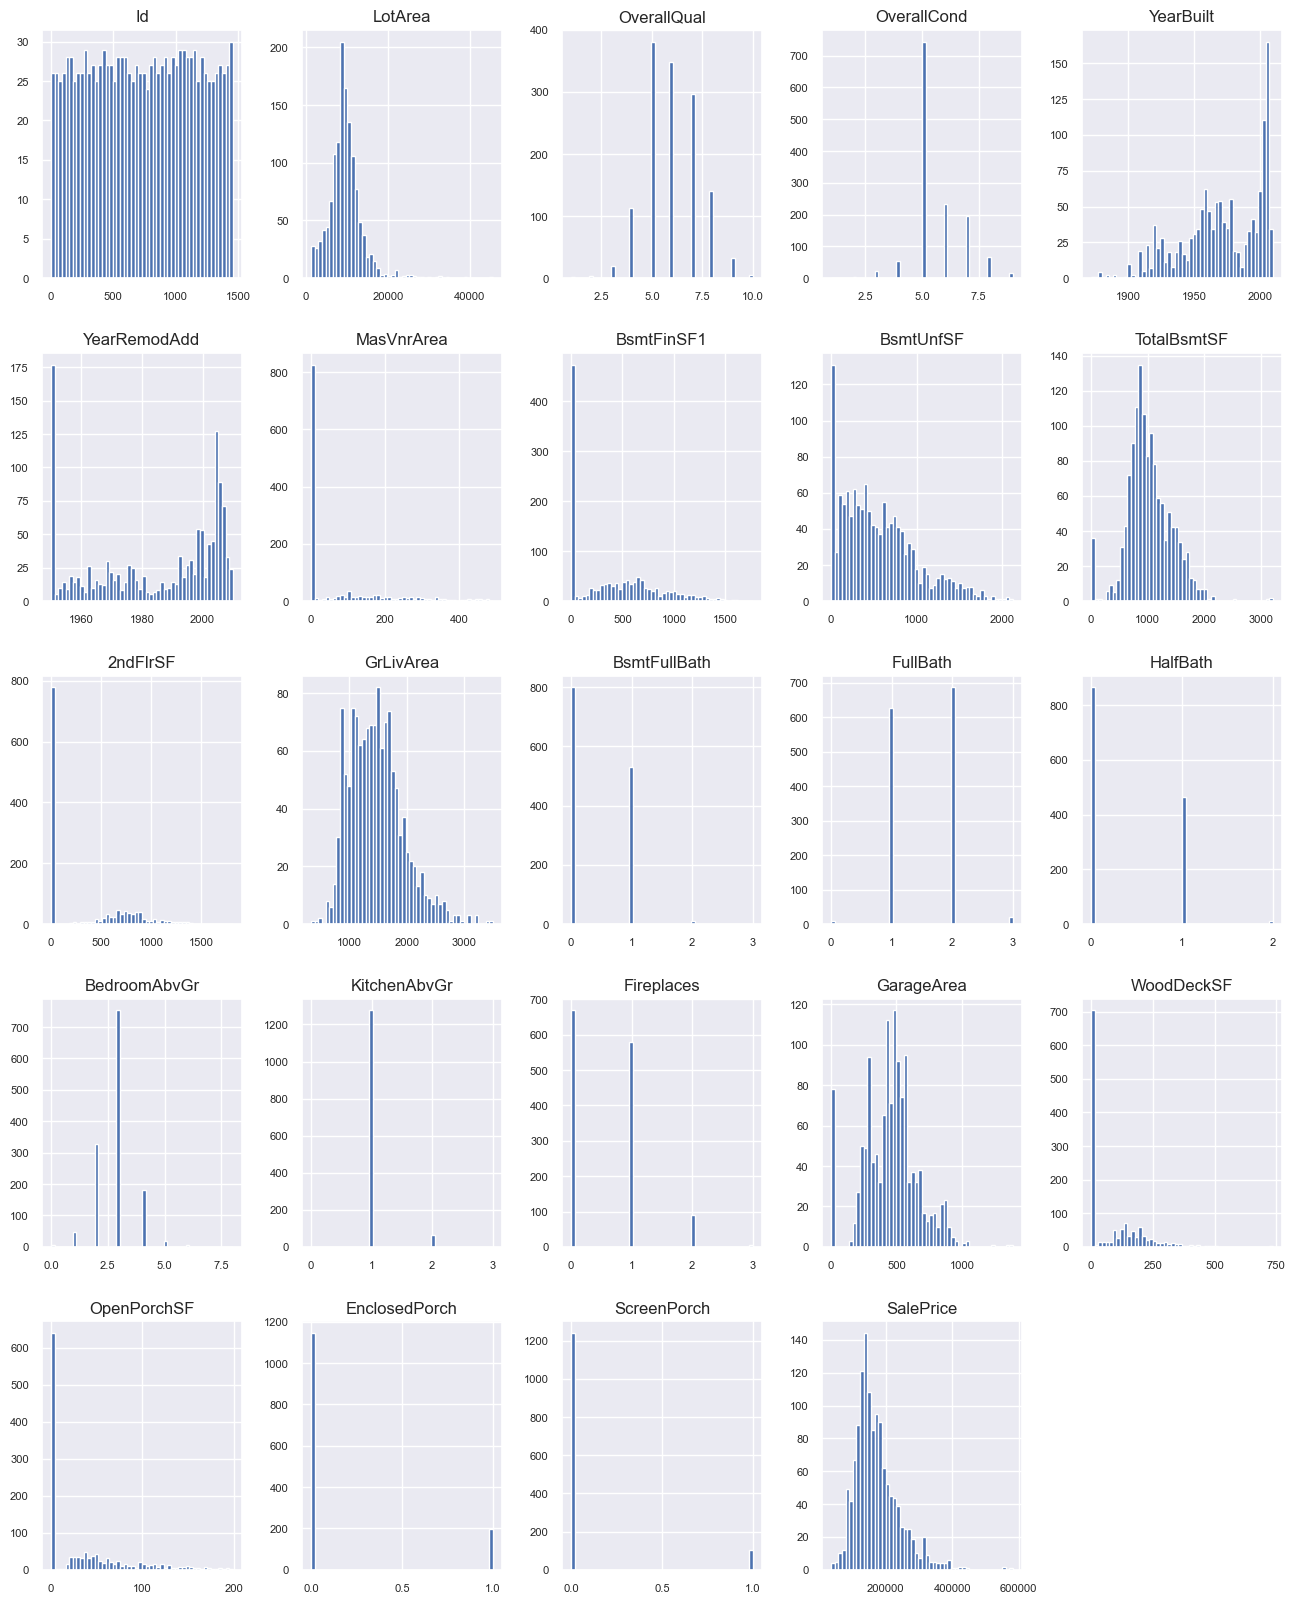

In [330]:
# # Numerical decription graphs
dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [331]:
dataset['GarageArea'].skew()

0.07704005550500276

In [332]:
# # Scale Data
dataset.LotArea = np.log1p(dataset.LotArea)
dataset.MasVnrArea = np.log1p(dataset.MasVnrArea)
dataset.BsmtFinSF1 = np.log1p(dataset.BsmtFinSF1)
dataset.BsmtUnfSF = np.log1p(dataset.BsmtUnfSF)
dataset.TotalBsmtSF = np.log1p(dataset.TotalBsmtSF)
dataset['2ndFlrSF'] = np.log1p(dataset['2ndFlrSF'])
dataset.GrLivArea = np.log1p(dataset.GrLivArea)
dataset.GarageArea = np.log1p(dataset.GarageArea)
dataset.OpenPorchSF = np.log1p(dataset.OpenPorchSF)
dataset.EnclosedPorch = np.log1p(dataset.EnclosedPorch)
dataset.WoodDeckSF = np.log1p(dataset.WoodDeckSF)

# dataset = np.log1p(dataset.iloc[:,1:dataset.columns.size])

In [335]:
pd.set_option('display.max_columns',None)
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,3,9.042040,3,5,5,7,5,2003,2003,1,12,5.283204,2,2,3,2,2.023008,1.794635,2.048136,0,2.047835,7.444833,1,2,1,3,1,2,0,6.308098,0.000000,4.127134,0.000000,0,208500
1,2,3,9.169623,3,24,2,6,8,1976,1976,1,8,0.000000,3,1,1,0,2.065156,1.894991,2.096943,0,0.000000,7.141245,0,2,0,3,1,3,1,6.133398,5.700444,0.000000,0.000000,0,181500
2,3,3,9.328212,0,5,5,7,5,2001,2002,1,12,5.093750,2,2,2,2,1.972450,1.956616,2.057383,0,2.049631,7.488294,1,2,1,3,1,2,1,6.411818,0.000000,3.761200,0.000000,0,223500
3,4,3,9.164401,0,6,5,7,5,1915,1970,1,13,0.000000,3,0,3,0,1.853152,1.986972,2.032004,2,2.032004,7.448916,1,1,0,3,1,2,1,6.466145,0.000000,3.583519,0.693147,0,140000
4,5,3,9.565284,0,15,5,8,5,2000,2000,1,12,5.860786,2,2,0,2,2.013056,1.973587,2.084931,0,2.074473,7.695758,1,2,1,4,1,2,1,6.729824,5.262690,4.442651,0.000000,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,8.976894,3,8,5,6,5,1999,2000,1,12,0.000000,3,2,3,5,0.000000,2.061871,2.061871,0,2.020741,7.407318,0,2,1,3,1,3,1,6.133398,0.000000,3.713572,0.000000,0,175000
1456,1457,3,9.486152,3,14,2,6,6,1978,1988,1,9,4.787492,3,1,3,0,2.037747,1.998790,2.121241,4,0.000000,7.637234,1,2,0,3,1,3,2,6.216606,5.857933,0.000000,0.000000,0,210000
1457,1458,3,9.109746,3,6,5,7,9,1941,2006,1,5,0.000000,0,4,3,2,1.890156,2.051254,2.085687,0,2.085687,7.758333,0,2,0,4,1,2,2,5.533389,0.000000,4.110874,0.000000,0,266500
1458,1459,3,9.181735,3,12,2,5,6,1950,1996,3,8,0.000000,3,1,2,2,1.591686,0.000000,2.077413,2,0.000000,6.983790,1,1,0,2,1,2,0,5.484797,5.905362,0.000000,0.693147,0,142125


In [336]:
# # # Scale Price
dataset.SalePrice = np.log1p(dataset.SalePrice)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'OpenPorchSF'

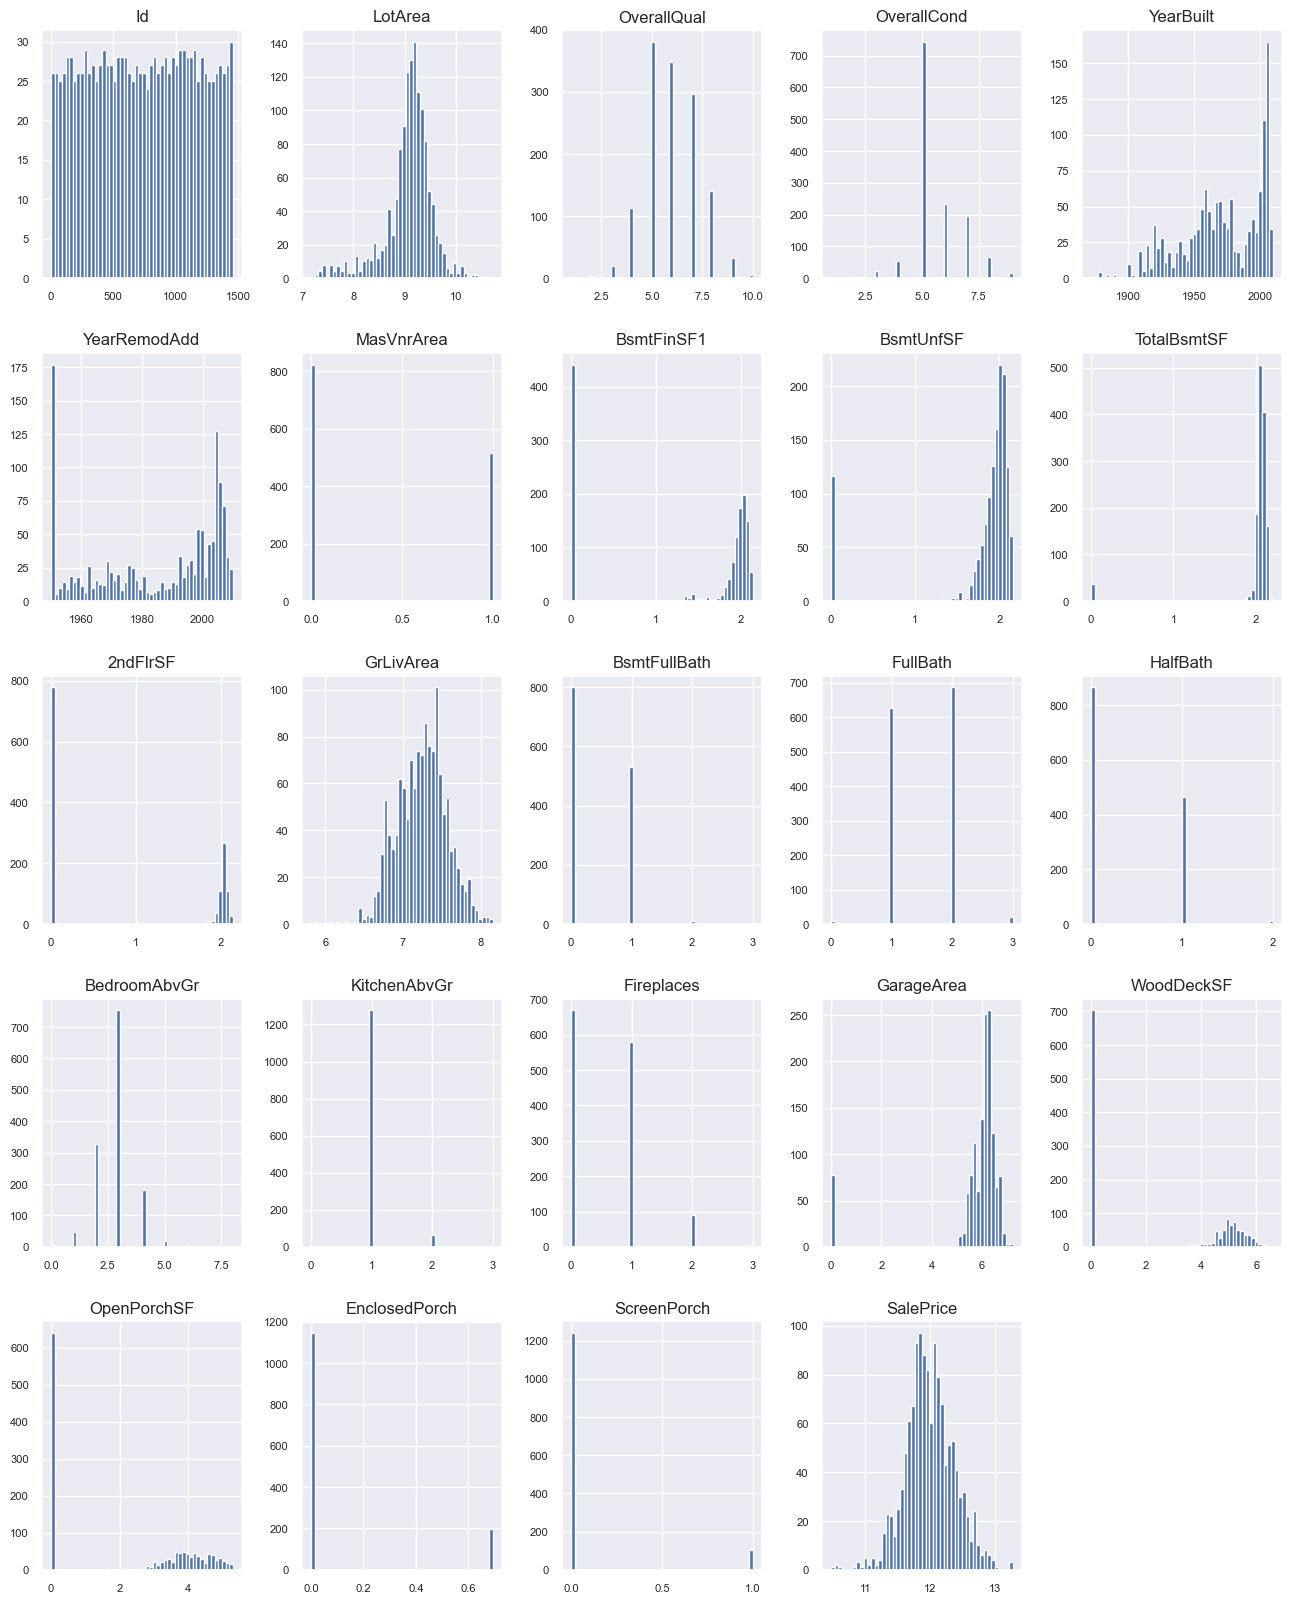

In [337]:
dataset['MasVnrArea'] = dataset['MasVnrArea'].apply(lambda x: 1 if x>0 else 0)
# # # Numerical description graphs
dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [338]:
# # # Numerical decription graphs
# dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
# dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [339]:
# dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
# dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [340]:
# Remove Nulls Test
test.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
                 'Fence', 'MiscFeature','GarageType','GarageFinish'], axis=1, inplace=True)
# for x in range(0, test.shape[1]):
#     col = test.columns[x]
#     if (test[col].dtype == object):
#         test[col] = test[col].fillna(test[col].mode()[0])
#     else:
#         test[col] = test[col].fillna(test[col].mean())
for i, column in enumerate(test):
    if (test[column].dtype == object):
        test[column] = test[column].fillna(test[column].mode()[0])
    else:
        test[column] = test[column].fillna(test[column].mean())

In [341]:
# Categorical Data Encoding
# Categorical features
cat_features = np.array([i for i in test.columns.tolist() if test[i].dtype == 'object'])

for i in cat_features:
    test[i] = enc_list[i].fit_transform(test[i])

In [342]:
# Drop Highly Corr Test
test.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
                 'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)

In [343]:
# Drop Low Corr Test
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
             "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
             "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
             "YrSold"]
test = test.drop(drops, axis=1)

In [344]:
# Not Important Test
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
             "GarageQual", "GarageCond", "PavedDrive",
             "PoolArea"]
test = test.drop(drops, axis=1)

In [345]:
# Drop One-Category
drops = [
'Condition1'  , 
'BldgType'    ,
'ExterCond'    ,
'BsmtQual'     ,
'CentralAir'   ,
'SaleType'     ,
'SaleCondition']
test = test.drop(drops, axis=1)

In [346]:
# dataset["SaleType_WD"] = dataset['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
# dataset["SaleType_CWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='CWD' else 0)
# dataset["SaleType_VWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='VWD' else 0)
# test["SaleType"] = test['SaleType'].apply(lambda x: 1 if x=='New' else 0)
# dataset["SaleType_COD"] = dataset['SaleType'].apply(lambda x: 1 if x=='COD' else 0)
# dataset["SaleType_Con"] = dataset['SaleType'].apply(lambda x: 1 if x=='Con' else 0)
# dataset["SaleType_ConLw"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLw' else 0)
# dataset["SaleType_ConLI"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLI' else 0)
# dataset["SaleType_ConLD"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLD' else 0)
# dataset["SaleType_Oth"] = dataset['SaleType'].apply(lambda x: 1 if x=='Oth' else 0)
test['EnclosedPorch'] = test['EnclosedPorch'].apply(lambda x: 1 if x>0 else 0)
test['ScreenPorch'] = test['ScreenPorch'].apply(lambda x: 1 if x>0 else 0)

In [347]:
# Categorical features
cat_features = np.array([i for i in test.columns.tolist() if test[i].dtype == 'object'])

In [348]:
test

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1461,2,11622,3,12,2,5,6,1961,1961,1,10,0.0,3,1,3,4,468.0,270.0,882.0,4,0,896,0.0,1,0,2,1,3,0,730.0,140,0,0,1
1,1462,3,14267,0,12,2,6,6,1958,1958,3,11,108.0,3,1,3,0,923.0,406.0,1329.0,4,0,1329,0.0,1,1,3,1,2,0,312.0,393,36,0,0
2,1463,3,13830,0,8,4,5,5,1997,1998,1,10,0.0,3,2,3,2,791.0,137.0,928.0,2,701,1629,0.0,2,1,3,1,3,1,482.0,212,34,0,0
3,1464,3,9978,0,8,4,6,6,1998,1998,1,10,20.0,3,2,3,2,602.0,324.0,926.0,0,678,1604,0.0,2,1,3,1,2,1,470.0,360,36,0,0
4,1465,3,5005,0,22,2,8,5,1992,1992,1,6,0.0,2,2,3,0,263.0,1017.0,1280.0,0,0,1280,0.0,2,0,2,1,2,0,506.0,0,82,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,1936,3,10,4,4,7,1970,1970,1,5,0.0,3,1,3,5,0.0,546.0,546.0,2,546,1092,0.0,1,1,3,1,3,0,0.0,0,0,0,0
1455,2916,4,1894,3,10,4,4,5,1970,1970,1,5,0.0,3,1,3,4,252.0,294.0,546.0,4,546,1092,0.0,1,1,3,1,3,0,286.0,0,24,0,0
1456,2917,3,20000,3,11,2,5,7,1960,1996,1,10,0.0,3,1,3,0,1224.0,0.0,1224.0,0,0,1224,1.0,1,0,4,1,3,1,576.0,474,0,0,0
1457,2918,3,10441,3,11,5,5,5,1992,1992,1,6,0.0,3,2,0,2,337.0,575.0,912.0,4,0,970,0.0,1,0,3,1,3,0,0.0,80,32,0,0


In [349]:
# # Transform Object Test
# for x in range(0, test.shape[1]):
#         if (test[test.columns[x]].dtype == object):
#             le = preprocessing.LabelEncoder()
#             le.fit(test[test.columns[x]])
#             test[test.columns[x]] = le.transform(
#                 test[test.columns[x]])
# Categorical Data Encoding test
# for i in cat_features:
#     test[i] = enc_list[i].fit_transform(test[i])


# test = pd.get_dummies(test,drop_first=True)

In [350]:
# test = imputer.fit_transform(test)

In [351]:
# # # Scale Data
# # # dataset = np.log1p(dataset)
test.BsmtFinSF1 = np.log1p(test.BsmtFinSF1)
test.BsmtUnfSF = np.log1p(test.BsmtUnfSF)
test.TotalBsmtSF = np.log1p(test.TotalBsmtSF)
test.GarageArea = np.log1p(test.GarageArea)
test.GrLivArea = np.log1p(test.GrLivArea)
test.LotArea = np.log1p(test.LotArea)
test.MasVnrArea = np.log1p(test.MasVnrArea)
test.OpenPorchSF = np.log1p(test.OpenPorchSF)
test.EnclosedPorch = np.log1p(test.EnclosedPorch)
test.WoodDeckSF = np.log1p(test.WoodDeckSF)

dataset['2ndFlrSF'] = np.log1p(dataset['2ndFlrSF'])
test['MasVnrArea'] = test['MasVnrArea'].apply(lambda x: 1 if x>0 else 0)


In [353]:
# cols = dataset.columns.tolist()
# test = test.reindex(columns=cols).fillna(0)

In [354]:
print(dataset.shape)
print(test.shape)

(1341, 36)
(1459, 35)


In [355]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

array = dataset.values
testarray = test.values
n = dataset.shape[1]
n = n-1

# test_X = testarray[:, 0:n]  # features
X = dataset.iloc[:,0:n]  # features
Y = dataset['SalePrice']  # target

best combination (ACC: 0.950): (0, 1, 2, 6, 7, 8, 9, 13, 16, 17, 18, 19, 22, 23, 30)



(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

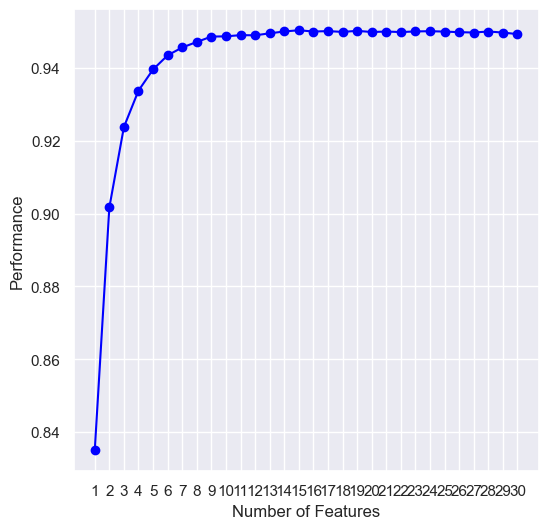

In [356]:
# XX = dataset.iloc[:, ~dataset.columns.isin(['Id','SalePrice'])]
# YY = dataset[['SalePrice']]

def rmse(y_true,y_pred):
    return 1 - np.sqrt(mean_squared_error(y_true,y_pred))

scorer = make_scorer(rmse,greater_is_better=True)


rfr = RandomForestRegressor()
sfs_range = SFS(estimator=rfr,
                k_features=(6,30),
                forward=True,
                floating=False,
                scoring=scorer,
                cv=0,n_jobs=8)

sfs_range.fit(X,Y)

# print the accuracy of the best combination as well as the set of best features
print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))

plt.rcParams["figure.figsize"] = (6,6)
# use the plot_sfs to visualize all accuracies
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [357]:
X_sfs = sfs_range.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_sfs, Y, test_size=0.2, random_state=200)  # test = 20%, train = 80%


In [358]:
# from sklearn.discriminant_analysis import StandardScaler
# from sklearn.pipeline import Pipeline


# pipeline1 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('linearregression', LinearRegression())
# ])

# param_grid = {'linearregression__fit_intercept': [True, False],
#               'linearregression__copy_X': [True, False]
#               }

# grid_search1 = GridSearchCV(pipeline1, param_grid, cv=12)
# grid_search1.fit(X,Y)

# print('Parameters : ', grid_search1.best_params_,'\nAccuracy Score : ', grid_search1.best_score_)

In [359]:
# from sklearn.tree import DecisionTreeRegressor

# pipeline2 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf2', DecisionTreeRegressor(random_state=42))
# ])

# param_grid2 = {
#     'clf2__max_depth': [2, 3, 4, 5],
#     'clf2__min_samples_split': [2, 5, 10],
#     'clf2__min_samples_leaf': [1, 2, 4],
#     'clf2__max_leaf_nodes': [None, 5, 10, 20]
# }

# grid_search2 = GridSearchCV(pipeline2, param_grid2, cv=15)
# grid_search2.fit(X,Y)

# print('Parameters : ', grid_search2.best_params_,'\nAccuracy Score : ', grid_search2.best_score_)

In [360]:
# pipeline5 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf5', RandomForestRegressor())
# ])

# param_grid5 = {
#     'clf5__n_estimators': [10, 50],
#     'clf5__max_features': ['auto', 'sqrt'],
#     'clf5__max_depth': [5, 15],
#     'clf5__min_samples_split': [2, 5],
#     'clf5__min_samples_leaf': [1, 3],
# }

# grid_search5 = GridSearchCV(pipeline5, param_grid5, cv=10,n_jobs=8)
# grid_search5.fit(X,Y)

# print('Parameters : ', grid_search5.best_params_,'\nAccuracy Score : ', grid_search5.best_score_)

In [361]:
# print("\nRandom Forest")
# rfr = RandomForestRegressor(max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
# rfr.fit(X, Y)

In [362]:
# result = np.exp(rfr.predict(test.iloc[:,1:35]))
# output = pd.DataFrame({'Id': test.Id, 'SalePrice': result})
# print(output)
# output.to_csv('submission.csv', index=False)

In [363]:
# from sklearn.discriminant_analysis import StandardScaler
# from sklearn.pipeline import Pipeline


# pipeline6 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf6', ensemble.GradientBoostingRegressor())
# ])

# param_grid6 = {
#     'clf6__n_estimators': [1000,2000,3000,4000],
#     'clf6__random_state': [1000,1234,1269],
#     'clf6__max_features': ['auto', 'sqrt', 'log2'],
#     'clf6__max_depth': [3,5, 15],
#     'clf6__min_samples_split': [2, 5,10,15],
#     'clf6__min_samples_leaf': [1, 3 ,6,11,15],
# }

# grid_search6 = GridSearchCV(pipeline6, param_grid6, cv=5,n_jobs=8)
# grid_search6.fit(x_train,y_train)

# print('Parameters : ', grid_search6.best_params_,'\nAccuracy Score : ', grid_search6.best_score_)

In [364]:
print("\nElasticNet")
ens_test = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.0015, 0.01, 0.015, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                                     l1_ratio=[0.01, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], max_iter=10000).fit(x_train, y_train)
ens_result = ens_test.predict(x_test)
print('\tR2: {}'.format(r2_score(ens_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ens_result, y_test))))
scores = cross_val_score(ens_test, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



ElasticNet
	R2: 0.7934966426236749
	RMSE: 0.1509067917315318
	Accuracy: 0.89 (+/- 0.04)


In [365]:
# print("\nDescisionTreeRegressor")
# dtr = DescisionTreeRegressor(2,2,2,'None')
# dtr.fit(x_train, y_train)
# preds = dtr.predict(x_test)
# scores = cross_val_score(dtr, X, Y, cv=5)
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [366]:
# print("\nXgBoost")
# xg_reg = xgb.XGBRegressor(objective='reg:linear', eval_metric='logloss',
#                           scoring='neg_mean_squared_error', subsample=0.95, colsample_bytree=0.3, learning_rate=0.04,
#                           max_depth=2, alpha=0.1, n_estimators=1000,)
# xg_reg.fit(x_train, y_train)
# preds = xg_reg.predict(x_test)
# scores = cross_val_score(xg_reg, X, Y, cv=5)
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [367]:
print("\nGradientBoostingRegressor")
g_best = ensemble.GradientBoostingRegressor(n_estimators=1850, random_state=1234, learning_rate=0.02, max_depth=3,
                                            max_features='log2', min_samples_leaf=11, min_samples_split=15, loss='huber').fit(x_train, y_train)
g_best_result = g_best.predict(x_test)
print('\tR2: {}'.format(r2_score(g_best_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(g_best_result, y_test))))
scores = cross_val_score(g_best, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


GradientBoostingRegressor
	R2: 0.8330916462771005
	RMSE: 0.1403349061344937
	Accuracy: 0.90 (+/- 0.03)


In [368]:
# print("\nLinearRegression")
# lr = linear_model.LinearRegression()
# lr.fit(x_train, y_train)
# lr_result = lr.predict(x_test)
# print('\tR2: {}'.format(r2_score(lr_result, y_test)))
# print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lr_result, y_test))))
# scores = cross_val_score(lr, X, Y, cv=5)
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [369]:
# print("\nRidge Regression")
# ridge = Ridge(max_iter=50000)
# ridge_est = GridSearchCV(
#     ridge, param_grid={"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
# ridge_est.fit(x_train, y_train)
# ridge_result = ridge_est.predict(x_test)
# print('\tR2: {}'.format(r2_score(ridge_result, y_test)))
# print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ridge_result, y_test))))
# scores = cross_val_score(ridge_est, X, Y, cv=5)
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [370]:
# print("\nLasso Regression")
# lasso = Lasso(max_iter=50000)
# lasso_est = GridSearchCV(
#     lasso, param_grid={"alpha": np.arange(0.0005, 0.001, 0.00001)})
# lasso_est.fit(x_train, y_train)
# lasso_result = lasso_est.predict(x_test)
# print('\tR2: {}'.format(r2_score(lasso_result, y_test)))
# print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lasso_result, y_test))))
# scores = cross_val_score(lasso_est, X, Y, cv=5)
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [371]:
test

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1461,2,9.360741,3,12,2,5,6,1961,1961,1,10,0,3,1,3,4,1.967197,1.887391,2.051984,4,0.000000,6.799056,0.0,1,0,2,1,3,0,6.594413,4.948760,0.000000,0.0,1
1,1462,3,9.565775,0,12,2,6,6,1958,1958,3,11,1,3,1,3,0,2.057798,1.947168,2.103272,4,0.000000,7.192934,0.0,1,1,3,1,2,0,5.746203,5.976351,3.610918,0.0,0
2,1463,3,9.534668,0,8,4,5,5,1997,1998,1,10,0,3,2,3,2,2.037911,1.779561,2.058487,2,6.553933,7.396335,0.0,2,1,3,1,3,1,6.180017,5.361292,3.555348,0.0,0
3,1464,3,9.208238,0,8,4,6,6,1998,1998,1,10,1,3,2,3,2,2.001739,1.914541,2.058212,0,6.520621,7.380879,0.0,2,1,3,1,2,1,6.154858,5.888878,3.610918,0.0,0
4,1465,3,8.518392,0,22,2,8,5,1992,1992,1,6,0,2,2,3,0,1.883419,2.070097,2.098680,0,0.000000,7.155396,0.0,2,0,2,1,2,0,6.228511,0.000000,4.418841,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,7.568896,3,10,4,4,7,1970,1970,1,5,0,3,1,3,5,0.000000,1.988484,1.988484,2,6.304449,6.996681,0.0,1,1,3,1,3,0,0.000000,0.000000,0.000000,0.0,0
1455,2916,4,7.546974,3,10,4,4,5,1970,1970,1,5,0,3,1,3,4,1.876926,1.900162,1.988484,4,6.304449,6.996681,0.0,1,1,3,1,3,0,5.659482,0.000000,3.218876,0.0,0
1456,2917,3,9.903538,3,11,2,5,7,1960,1996,1,10,0,3,1,3,0,2.093184,0.000000,2.093184,0,0.000000,7.110696,1.0,1,0,4,1,3,1,6.357842,6.163315,0.000000,0.0,0
1457,2918,3,9.253591,3,11,5,5,5,1992,1992,1,6,0,3,2,0,2,1.920306,1.995531,2.056267,4,0.000000,6.878326,0.0,1,0,3,1,3,0,0.000000,4.394449,3.496508,0.0,0


In [372]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,3,9.042040,3,5,5,7,5,2003,2003,1,12,1,2,2,3,2,2.023008,1.794635,2.048136,0,1.114431,7.444833,1,2,1,3,1,2,0,6.308098,0.000000,4.127134,0.000000,0,12.247699
1,2,3,9.169623,3,24,2,6,8,1976,1976,1,8,0,3,1,1,0,2.065156,1.894991,2.096943,0,0.000000,7.141245,0,2,0,3,1,3,1,6.133398,5.700444,0.000000,0.000000,0,12.109016
2,3,3,9.328212,0,5,5,7,5,2001,2002,1,12,1,2,2,2,2,1.972450,1.956616,2.057383,0,1.115021,7.488294,1,2,1,3,1,2,1,6.411818,0.000000,3.761200,0.000000,0,12.317171
3,4,3,9.164401,0,6,5,7,5,1915,1970,1,13,0,3,0,3,0,1.853152,1.986972,2.032004,2,1.109224,7.448916,1,1,0,3,1,2,1,6.466145,0.000000,3.583519,0.693147,0,11.849405
4,5,3,9.565284,0,15,5,8,5,2000,2000,1,12,1,2,2,0,2,2.013056,1.973587,2.084931,0,1.123133,7.695758,1,2,1,4,1,2,1,6.729824,5.262690,4.442651,0.000000,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,8.976894,3,8,5,6,5,1999,2000,1,12,0,3,2,3,5,0.000000,2.061871,2.061871,0,1.105502,7.407318,0,2,1,3,1,3,1,6.133398,0.000000,3.713572,0.000000,0,12.072547
1456,1457,3,9.486152,3,14,2,6,6,1978,1988,1,9,1,3,1,3,0,2.037747,1.998790,2.121241,4,0.000000,7.637234,1,2,0,3,1,3,2,6.216606,5.857933,0.000000,0.000000,0,12.254868
1457,1458,3,9.109746,3,6,5,7,9,1941,2006,1,5,0,0,4,3,2,1.890156,2.051254,2.085687,0,1.126774,7.758333,0,2,0,4,1,2,2,5.533389,0.000000,4.110874,0.000000,0,12.493133
1458,1459,3,9.181735,3,12,2,5,6,1950,1996,3,8,0,3,1,2,2,1.591686,0.000000,2.077413,2,0.000000,6.983790,1,1,0,2,1,2,0,5.484797,5.905362,0.000000,0.693147,0,11.864469


In [373]:
result = np.exp(g_best.predict(test.iloc[:,[0, 1, 2, 6, 7, 8, 9, 13, 16, 17, 18, 19, 22, 23, 30]]))
output = pd.DataFrame({'Id': test.Id, 'SalePrice': result})
print(output)
output.to_csv('submission.csv', index=False)

        Id      SalePrice
0     1461  127239.757441
1     1462  164933.871725
2     1463  177524.774157
3     1464  189179.084065
4     1465  183658.251630
...    ...            ...
1454  2915   82029.584116
1455  2916   86579.181756
1456  2917  173685.711282
1457  2918  118975.946396
1458  2919  214001.587255

[1459 rows x 2 columns]
